In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#NOTE: aucs.csv generated by sbatch script for each of 11 alphas, concatenating SLURM outputs, regex to transform into CSV
#TO-USE: choose target aucs.csv and Kernel->Restart & Run All
#TARGET = 'run-01/aucs.csv'
TARGET = 'run-02/aucs.csv'

In [3]:
df = pd.read_csv(TARGET)
print(df)

            Source  Alpha       AUC
0   acm_test_final    0.0  0.500000
1           Amazon    0.0  0.436215
2      BlogCatalog    0.0  0.731544
3           Disney    0.0  0.504237
4            Enron    0.0  0.500000
..             ...    ...       ...
69     BlogCatalog    1.0  0.779000
70          Disney    1.0  0.507062
71           Enron    1.0  0.688587
72         Flickr1    1.0  0.744848
73         Flickr2    1.0  0.510202

[74 rows x 3 columns]


In [4]:
by_source = df.set_index('Alpha').groupby('Source')
by_source.describe()

AUC                                                    \
               count      mean       std       min       25%       50%   
Source                                                                   
Amazon          11.0  0.591258  0.076642  0.436215  0.624627  0.625180   
BlogCatalog     11.0  0.789594  0.028754  0.731544  0.780812  0.785214   
Disney          11.0  0.520031  0.022277  0.473164  0.505650  0.526836   
Enron           11.0  0.676253  0.059784  0.500000  0.688357  0.690095   
Flickr1          8.0  0.749408  0.009997  0.730337  0.747220  0.748736   
Flickr2         11.0  0.559129  0.132889  0.473202  0.488941  0.504855   
acm_test_final  11.0  0.806800  0.108152  0.500000  0.789055  0.846587   

                                    
                     75%       max  
Source                              
Amazon          0.626233  0.627428  
BlogCatalog     0.795898  0.851919  
Disney          0.537429  0.545198  
Enron           0.690390  0.731076  
Flickr1         0.754292  0.765478  
Flickr2         0.539508  0.895392  
acm_test_final  0.860939  0.879288

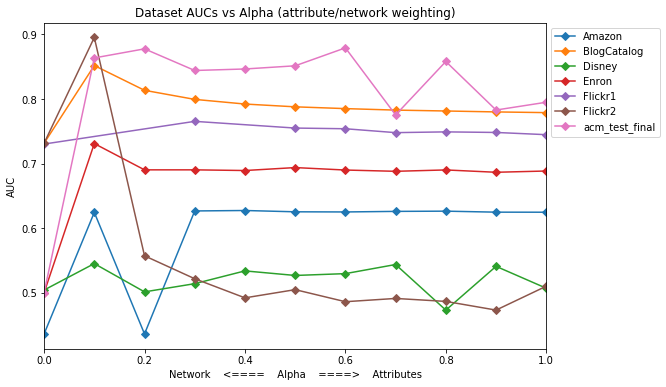

In [5]:
fig, ax = plt.subplots()
SCALE = 1.5
by_source['AUC'].plot(ax=ax, linestyle='-', marker='D', figsize=[SCALE*i for i in plt.rcParams['figure.figsize']])
plt.xlabel('Network    <====    Alpha    ====>    Attributes')
plt.ylabel('AUC')
plt.title('Dataset AUCs vs Alpha (attribute/network weighting)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [6]:
for k, v in by_source:
    print(by_source.get_group(k), "\n\n")

       Source       AUC
Alpha                  
0.0    Amazon  0.436215
0.1    Amazon  0.624486
0.2    Amazon  0.436292
0.3    Amazon  0.626734
0.4    Amazon  0.627428
0.5    Amazon  0.625411
0.6    Amazon  0.625180
0.7    Amazon  0.626053
0.8    Amazon  0.626413
0.9    Amazon  0.624859
1.0    Amazon  0.624769 


            Source       AUC
Alpha                       
0.0    BlogCatalog  0.731544
0.1    BlogCatalog  0.851919
0.2    BlogCatalog  0.813554
0.3    BlogCatalog  0.799499
0.4    BlogCatalog  0.792298
0.5    BlogCatalog  0.787972
0.6    BlogCatalog  0.785214
0.7    BlogCatalog  0.782910
0.8    BlogCatalog  0.781535
0.9    BlogCatalog  0.780090
1.0    BlogCatalog  0.779000 


       Source       AUC
Alpha                  
0.0    Disney  0.504237
0.1    Disney  0.545198
0.2    Disney  0.501412
0.3    Disney  0.514124
0.4    Disney  0.533898
0.5    Disney  0.526836
0.6    Disney  0.529661
0.7    Disney  0.543785
0.8    Disney  0.473164
0.9    Disney  0.540960
1.0    Disney  0.